# This is notebook to do basic calculations for array design


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Define Parameters

chan_width = 10 # kHz
start_nu = 400 # MHz
end_nu = 1400 # MHz
num_chan = int((end_nu-start_nu)/chan_width*1000)
nu_array=np.linspace(start_nu,end_nu,num_chan)

obs_nu = 800 # MHz
D = 2 # Meters
lam = 3.e8/800.e6
theta = lam / D # rad
theta_deg = theta * 180/np.pi 

print(lam, 'm', theta_deg, 'deg')

0.375 m 10.742958658702936 deg


In [70]:
D_array = np.linspace(0.5,25,200)
lam_array = np.linspace(0.2,1,100)
nu_array = 300/lam_array
lamd_array = np.meshgrid(D_array, lam_array)
theta_array = lamd_array[1]/lamd_array[0]
theta_deg_array = theta_array * 180/np.pi 
print(nu_array)

[1500.         1441.74757282 1387.85046729 1337.83783784 1291.30434783
 1247.89915966 1207.31707317 1169.29133858 1133.58778626 1100.
 1068.34532374 1038.46153846 1010.20408163  983.44370861  958.06451613
  933.96226415  911.04294479  889.22155689  868.42105263  848.57142857
  829.60893855  811.47540984  794.11764706  777.48691099  761.53846154
  746.23115578  731.5270936   717.39130435  703.79146919  690.69767442
  678.08219178  665.91928251  654.18502203  642.85714286  631.91489362
  621.33891213  611.11111111  601.2145749   591.63346614  582.35294118
  573.35907336  564.63878327  556.17977528  547.9704797   540.
  532.25806452  524.73498233  517.42160279  510.30927835  503.38983051
  496.65551839  490.0990099   483.71335505  477.49196141  471.42857143
  465.51724138  459.75232198  454.12844037  448.64048338  443.28358209
  438.05309735  432.94460641  427.95389049  423.07692308  418.30985915
  413.64902507  409.09090909  404.63215259  400.26954178  396.
  391.82058047  387.72845953  

[89]


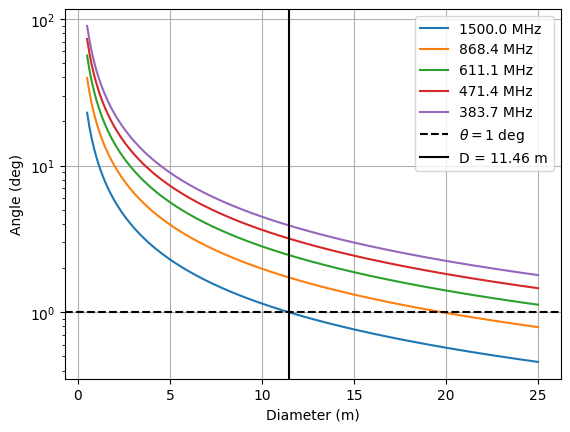

In [86]:
D_idx=np.where(abs(theta_deg_array[0]-1)==np.min(abs(theta_deg_array[0]-1)))[0]
print(D_idx)
for i in range(5):
    plt.plot(D_array,theta_deg_array[18*i],label=str(np.round(nu_array[18*i],1))+' MHz')
plt.xlabel('Diameter (m)')
plt.ylabel('Angle (deg)')
# plt.xscale('log')
plt.yscale('log')
plt.axhline(y=1,linestyle='--',color='k',label='$\\theta=$1 deg')
plt.axvline(x=D_array[D_idx],color='k',label='D = '+str(np.round(D_array[D_idx][0],2))+' m')
plt.legend()
plt.grid()

In [118]:
min_S = 1.e4 # 0.1 SFU 
Tsys = 300 # in K
sigma_dec =5
tau=0.001 # in sec
BW = 1.e4 # 10 kHz
del_Srms = min_S/sigma_dec
tauBW = np.sqrt(tau*BW)
print('sqrt(tau*BW) =',tauBW)
A = 2*1380*Tsys/del_Srms/tauBW # in sq. mts
SEFD = 2*1380/A # in Jy
dish_diameter = np.sqrt(4*A/np.pi)
print('Area:',A,'sq. m ','SEFD:',SEFD,' Jy')
print('Dish diameter:', dish_diameter)

lf=400 # lower end frequency (MHz)
hf=1600 # high end frequency
lang = (3.e2/lf)/dish_diameter*180/np.pi
hang = (3.e2/hf)/dish_diameter*180/np.pi
print('Angle range',hang,' to ',lang)

nchan = (hf-lf)*1.e6/BW # number of channels for 400 MHz to 1600 MHz
nbytes = 2
data_rate = nchan*nbytes/tau
print('Data Rates:',data_rate/1.e6,'Mbytes s$^{-1}$ ','nchan:',nchan)



sqrt(tau*BW) = 3.1622776601683795
Area: 130.9182951309709 sq. m  SEFD: 21.081851067789195  Jy
Dish diameter: 12.910861725309472
Angle range 0.8320868805870065  to  3.328347522348026
Data Rates: 240.0 Mbytes s$^{-1}$  nchan: 120000.0


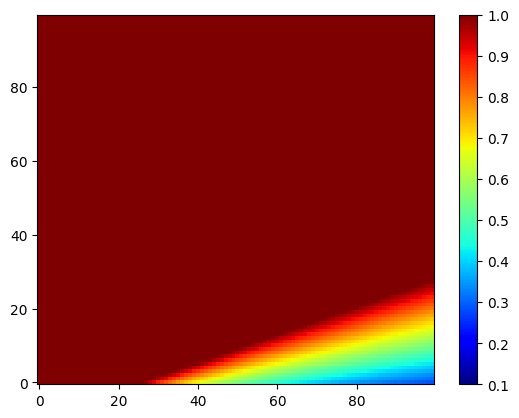

In [30]:
f,ax=plt.subplots(1,1)
im1=ax.imshow(theta_deg_array,origin='lower',cmap='jet',vmin=0.1,vmax=1.0,aspect='auto')
#ax.set_yscale('log')
#ax.set_xscale('log')
f.colorbar(im1)